# **Importing dependencies**


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

# Loading data

In [2]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)


*   **Customer identification**:'customerID', 'gender', 'SeniorCitizen','Partner', 'Dependents'
*   **Customer account identification:**'tenure','Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'


*  **Services:**'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'
*  **Retention:**'Churn'


# Data manipulation

In [8]:
df.drop('customerID',axis='columns',inplace=True)

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Categorical features:'customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'
Numeric features:, 'SeniorCitizen',, 'tenure', 'MonthlyCharges'

In [10]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [11]:
df_final=df[df.TotalCharges!=" "]

In [12]:
df_final.shape

(7032, 20)

In [13]:
df_final['TotalCharges'] = pd.to_numeric(df_final['TotalCharges'], errors='coerce')

/tmp/ipykernel_19/2824507644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['TotalCharges'] = pd.to_numeric(df_final['TotalCharges'], errors='coerce')


In [14]:
df_final.TotalCharges.dtypes

dtype('float64')

# Visualisation

In [15]:
numeric_features=['tenure', 'MonthlyCharges', 'TotalCharges']
df_final[numeric_features].describe()


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [16]:
#analysis of objects
#Internet Service
df_final["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [17]:
df_final["PaymentMethod"].describe(include=['object', 'bool'])

count                 7032
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object

In [18]:
df_final['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

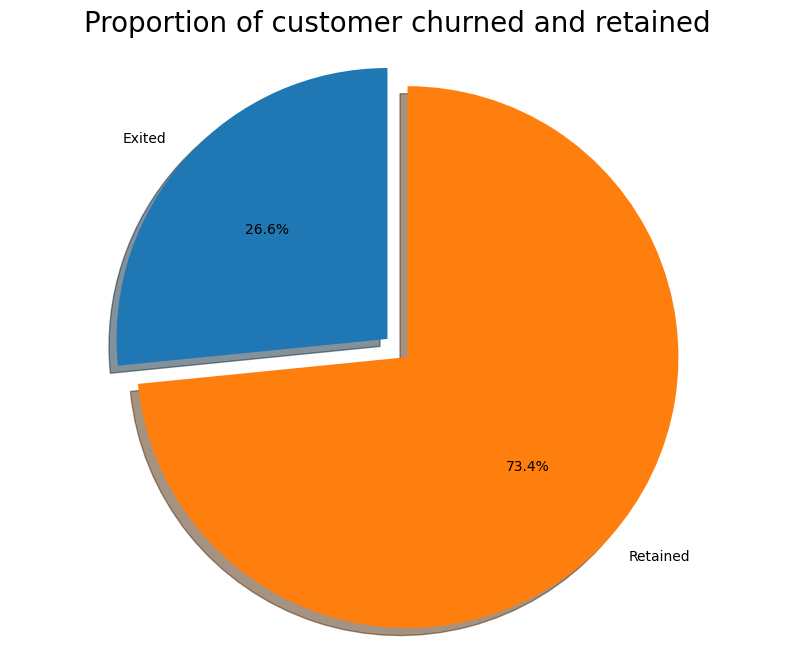

In [19]:
labels = 'Exited', 'Retained'
sizes = [df_final.Churn[df_final['Churn']=='Yes'].count(), df_final.Churn[df_final['Churn']=='No'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

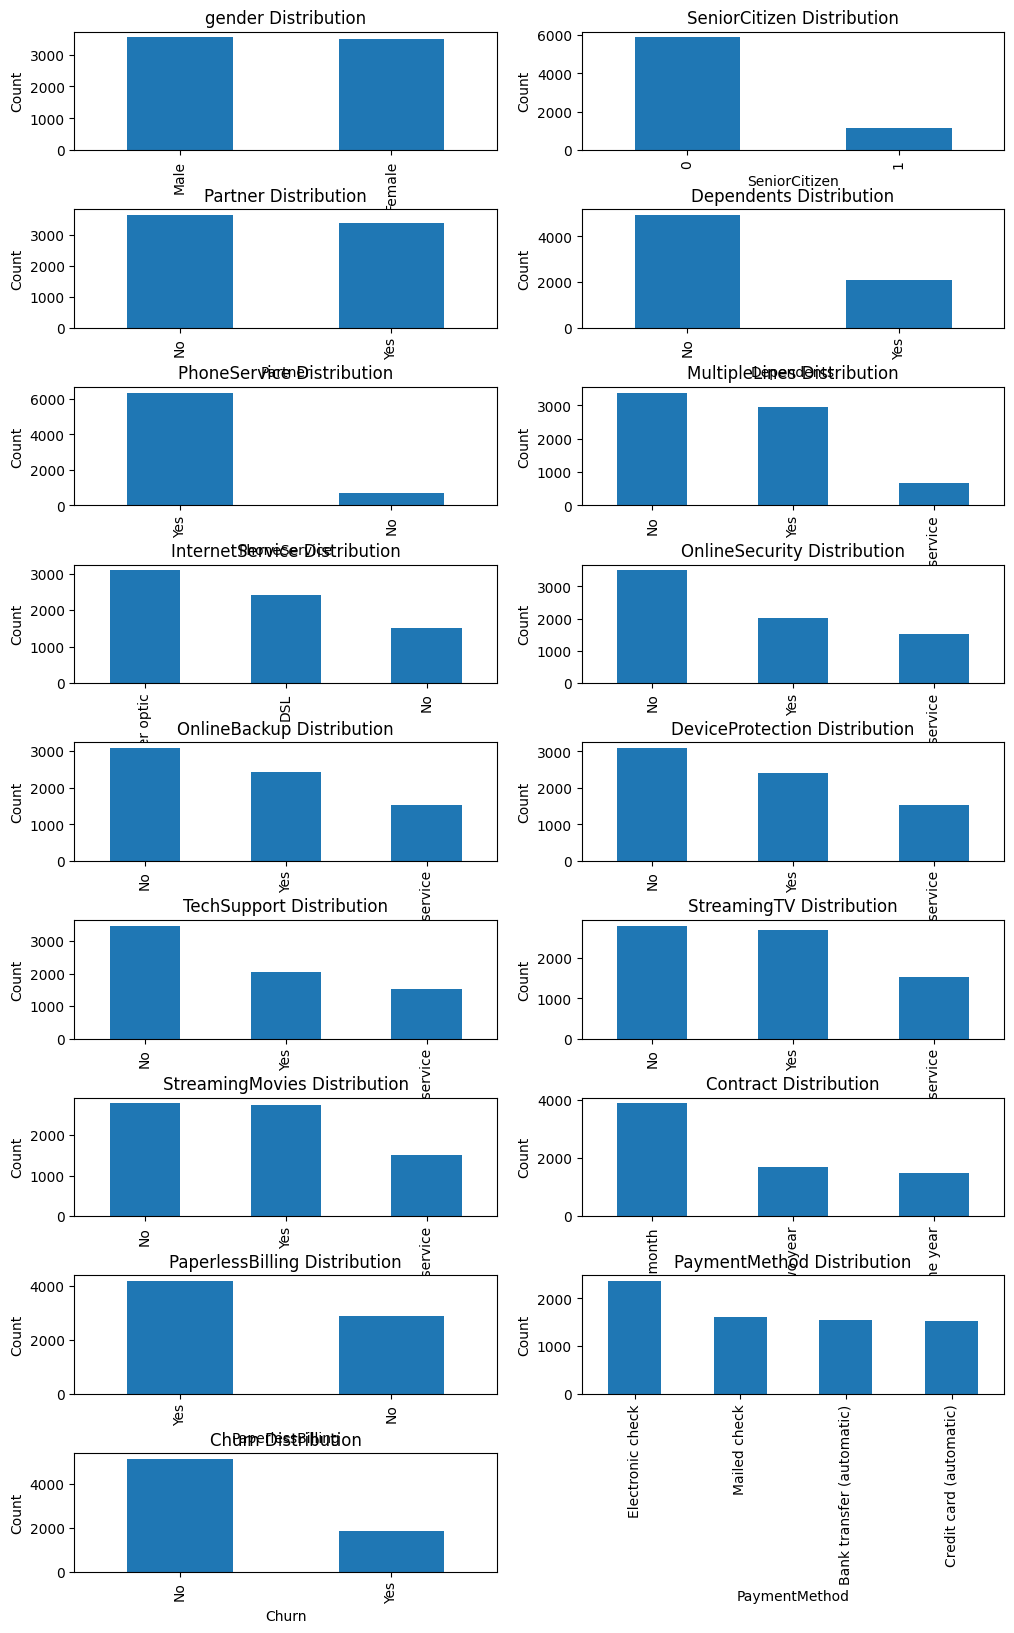

In [20]:
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Calculate the number of rows and columns for subplots
num_rows = len(categorical_columns) // 2  # 2 columns per row
if len(categorical_columns) % 2 != 0:
    num_rows += 1

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 20))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Flatten the 2D array of subplots for easier iteration
axes = axes.flatten()

# Loop through categorical columns and create bar charts
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    df_final[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Remove empty subplots if the number of columns is odd
if len(categorical_columns) % 2 != 0:
    fig.delaxes(axes[-1])

# Display the plots
plt.show()


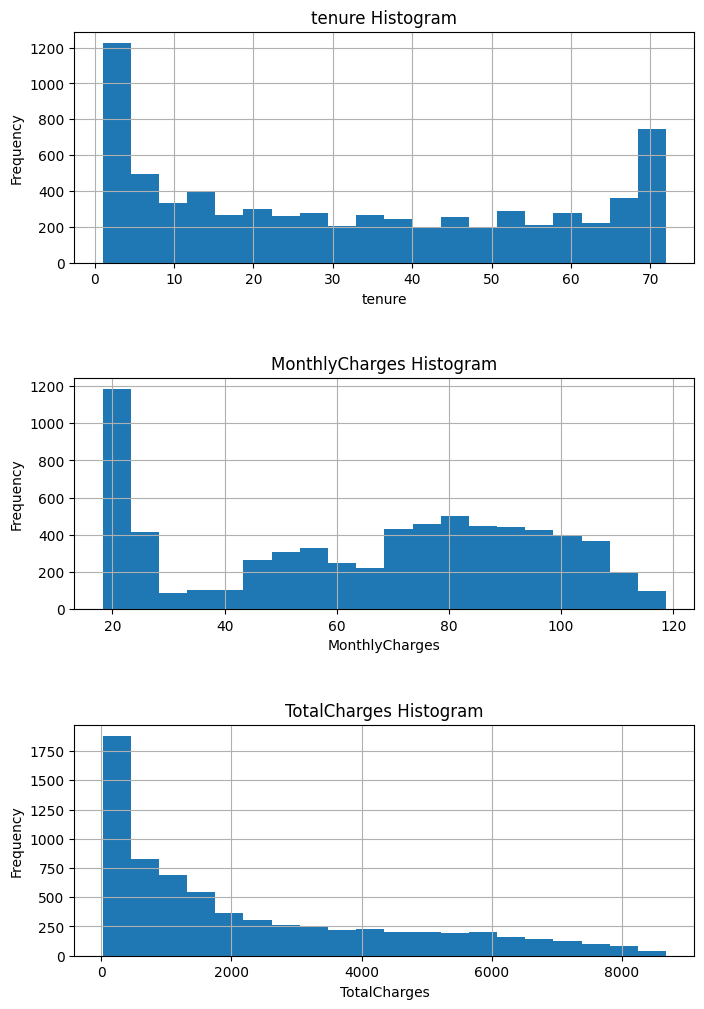

In [21]:
num_rows = len(numeric_features)
num_cols = 1  # We want one column for histograms

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 12))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# If there's only one numeric feature, axes will not be an array, so we need to wrap it in a list
if len(numeric_features) == 1:
    axes = [axes]

# Loop through numeric features and create histograms
for i, column in enumerate(numeric_features):
    ax = axes[i]
    df_final[column].hist(ax=ax, bins=20)  # Adjust the number of bins as needed
    ax.set_title(f'{column} Histogram')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Display the plots
plt.show()

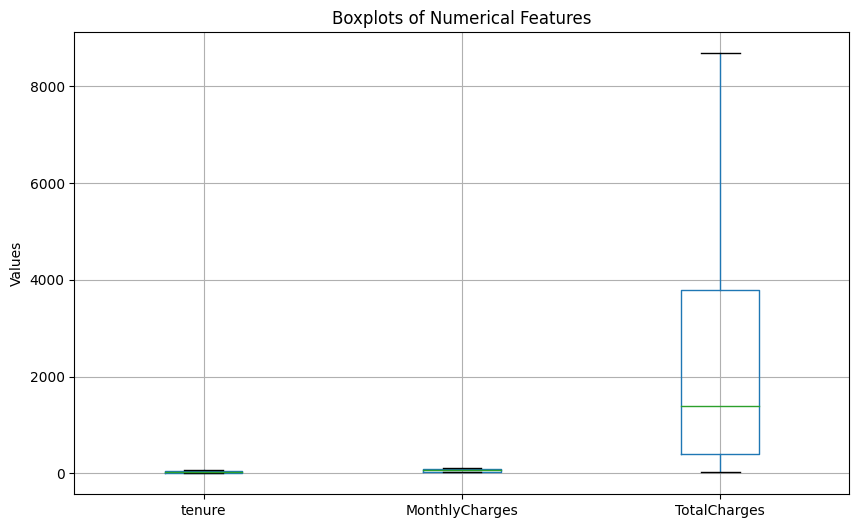

In [22]:
plt.figure(figsize=(10, 6))
df_final[numeric_features].boxplot()
plt.title('Boxplots of Numerical Features')
plt.ylabel('Values')

# Display the plot
plt.show()

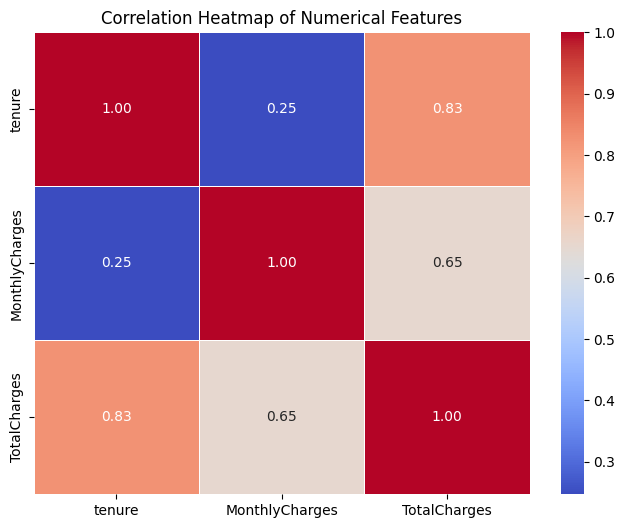

In [23]:
correlation_matrix = df_final[numeric_features].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')

# Display the heatmap
plt.show()

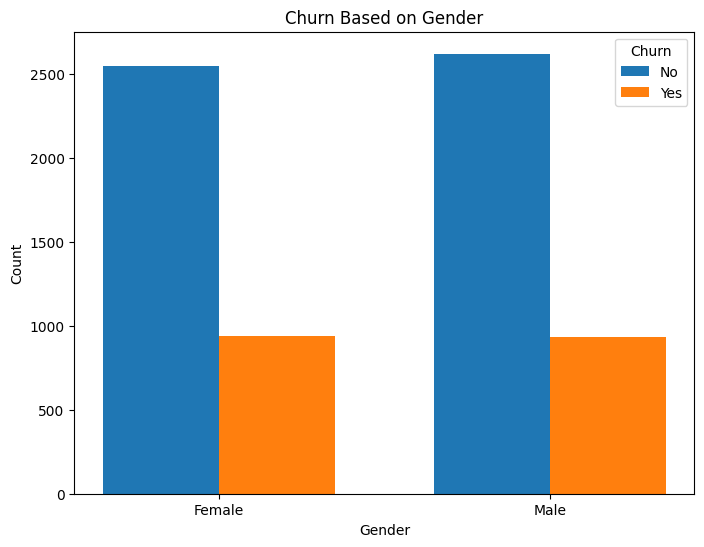

In [24]:
churn_gender = df_final.groupby(['gender', 'Churn']).size().unstack()

width = 0.35
x = np.arange(len(churn_gender.index))
labels = churn_gender.index
churn_labels = churn_gender.columns

fig, ax = plt.subplots(figsize=(8, 6))

for i, churn_label in enumerate(churn_labels):
    ax.bar(x + i * width, churn_gender[churn_label], width, label=churn_label)

ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Churn Based on Gender')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels)
ax.legend(title='Churn')
plt.show()

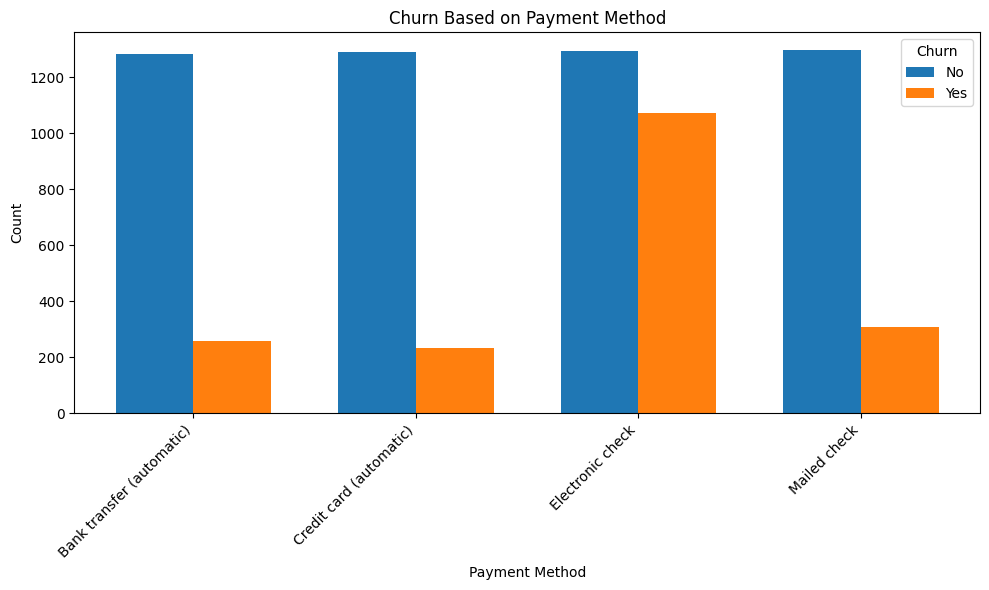

In [25]:
churn_payment = df_final.groupby(['PaymentMethod', 'Churn']).size().unstack()

width = 0.35
x = np.arange(len(churn_payment.index))
labels = churn_payment.index
churn_labels = churn_payment.columns

fig, ax = plt.subplots(figsize=(10, 6))

for i, churn_label in enumerate(churn_labels):
    ax.bar(x + i * width, churn_payment[churn_label], width, label=churn_label)

ax.set_xlabel('Payment Method')
ax.set_ylabel('Count')
ax.set_title('Churn Based on Payment Method')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend(title='Churn')
plt.tight_layout()
plt.show()

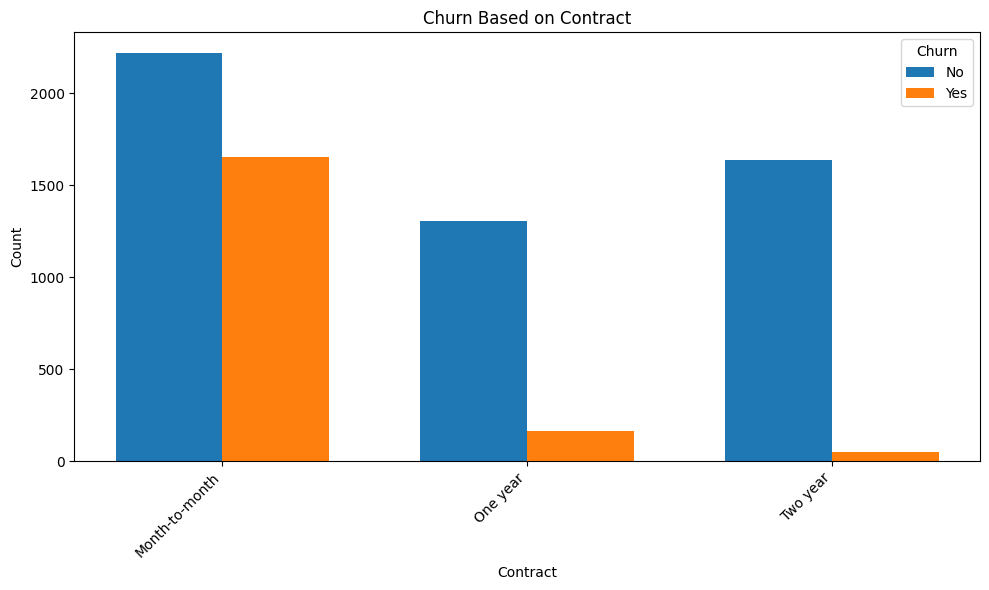

In [26]:
churn_contract = df_final.groupby(['Contract', 'Churn']).size().unstack()

width = 0.35
x = np.arange(len(churn_contract.index))
labels = churn_contract.index
churn_labels = churn_contract.columns

fig, ax = plt.subplots(figsize=(10, 6))

for i, churn_label in enumerate(churn_labels):
    ax.bar(x + i * width, churn_contract[churn_label], width, label=churn_label)

ax.set_xlabel('Contract')
ax.set_ylabel('Count')
ax.set_title('Churn Based on Contract')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend(title='Churn')
plt.tight_layout()
plt.show()

Tenure and churn

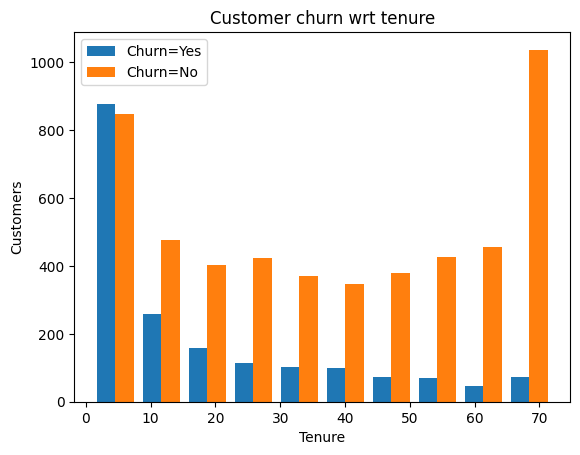

In [27]:
tenure_churn_no=df_final[df_final.Churn=='No'].tenure
tenure_churn_yes=df_final[df_final.Churn=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Customers")
plt.title("Customer churn wrt tenure")
plt.hist([tenure_churn_yes,tenure_churn_no],label=['Churn=Yes','Churn=No'])
plt.legend()

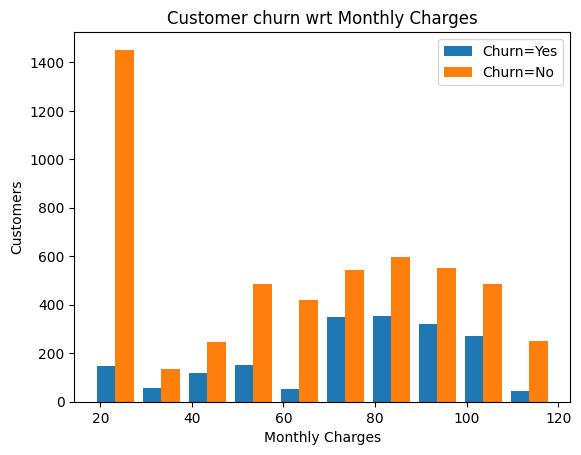

In [28]:
monthly_charge_no=df_final[df_final.Churn=='No'].MonthlyCharges
monthly_charge_yes=df_final[df_final.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Customers")
plt.title("Customer churn wrt Monthly Charges")
plt.hist([monthly_charge_yes,monthly_charge_no],label=['Churn=Yes','Churn=No'])
plt.legend()

In [29]:
df_final.replace('No internet service','No',inplace=True)
df_final.replace('No phone service','No',inplace=True)

/tmp/ipykernel_19/3818021257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.replace('No internet service','No',inplace=True)
/tmp/ipykernel_19/3818021257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.replace('No phone service','No',inplace=True)


In [30]:
def unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [31]:
unique_col_values(df_final)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [32]:
booleans=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in booleans:
    df_final[col].replace({'Yes': 1,'No': 0},inplace=True)

/tmp/ipykernel_19/478286150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[col].replace({'Yes': 1,'No': 0},inplace=True)


In [33]:
for col in df_final:
    print(f'{col}: {df_final[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [34]:
df_final['gender'].replace({'Female':1,'Male':0},inplace=True)

/tmp/ipykernel_19/1342593147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['gender'].replace({'Female':1,'Male':0},inplace=True)


In [35]:
df_final.gender.unique()

array([1, 0])

In [36]:
df_dataset = pd.get_dummies(data=df_final, columns=['InternetService','Contract','PaymentMethod'],dtype=int)
df_dataset.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [37]:
df_dataset.info

<bound method DataFrame.info of       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      34             1   
2          0              0        0           0       2             1   
3          0              0        0           0      45             0   
4          1              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        1           1      24             1   
7039       1              0        1           1      72             1   
7040       1              0        1           1      11             0   
7041       0              1        1           0       4             1   
7042       0              0        0           0      66             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0  

In [38]:
df_dataset.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

# Scaling numerical data

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [40]:
scaled_columns=['tenure','TotalCharges','MonthlyCharges']
df_dataset[scaled_columns]=scaler.fit_transform(df_dataset[scaled_columns])


In [41]:
df_dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


# Train test split

In [42]:
x=df_dataset.drop('Churn',axis='columns')
y=df_dataset['Churn']

In [43]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [44]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# Model building and training

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [46]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
    
    
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5192 - accuracy: 0.7385
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.7893
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.7989
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8000
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4150 - accuracy: 0.8037
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8039
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8052
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8055
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8066
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4082 - accura

In [47]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.7925


[0.45228081941604614, 0.7924662232398987]

In [48]:
y_pred=model.predict(x_test)

44/44 [==============================] - 0s 1ms/step


In [49]:
y_pred

array([[0.33979157],
       [0.6141764 ],
       [0.01952801],
       ...,
       [0.70573413],
       [0.6543392 ],
       [0.6410428 ]], dtype=float32)

In [50]:
y_prediction=[]
for pred in y_pred:
    if pred>0.5:
        y_prediction.append(1)
    else:
        y_prediction.append(0)

In [51]:
y_prediction[:5]

[0, 1, 0, 1, 0]

Classification report

# Classification report

In [52]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.68      0.54      0.60       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Undersampling technique

In [53]:
count_class_0,count_class_1=df_final.Churn.value_counts()

df_class_0=df_dataset[df_dataset['Churn']==0]
df_class_1=df_dataset[df_dataset['Churn']==1]

In [54]:
df_class_0.shape

(5163, 27)

In [55]:
df_class_1.shape

(1869, 27)

# Solving data imbalance

Undersampling

In [56]:
df_class_0_under=df_class_0.sample(count_class_1)
df_class_0_under.shape

(1869, 27)

In [57]:
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape

(3738, 27)

In [58]:
x=df_test_under.drop('Churn',axis='columns')
y=df_test_under['Churn']
from sklearn.model_selection import train_test_split
x_train_under,x_test_under,y_train_under,y_test_under=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [59]:
y_train_under.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

Oversampling

In [60]:
count_class_0,count_class_1

(5163, 1869)

In [61]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)

In [62]:
df_test_over.Churn.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

SMOTE

In [63]:
x=df_dataset.drop('Churn',axis='columns')
y=df_dataset['Churn']

In [64]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)

In [65]:
y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64